In [2]:
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt

In [3]:
data = sc.read("../4_diff_gene_analysis/diff_gene_data.h5ad")

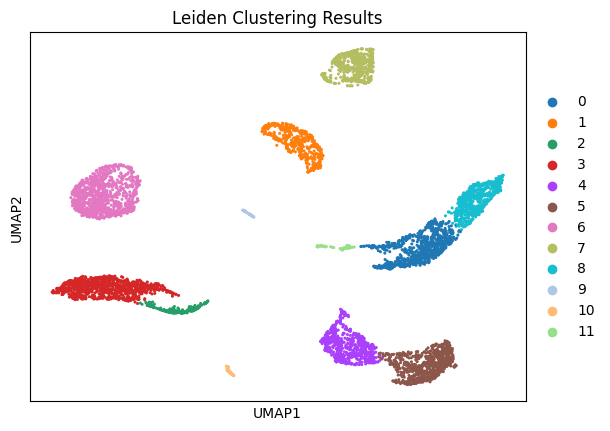

In [4]:
sc.pl.umap(data, color='leiden', title='Leiden Clustering Results') #so we can compare group locations

Looking at the results of the differential gene expression mixed with violin plots, we see that once again (dotplot), groups 0 and 8 share the same top marker genes. Group 1 doesn't have markers that are truly exclusive, but they are more highly expressed in group 1. Group 2 does share marker genes with group 3, but it also has a unique marker, justifying that its a seperate cluster, so we should not combine it with group 2! The rest of the groups all have unique marker genes, justifying that they are indeed seperate clusters of cell types.

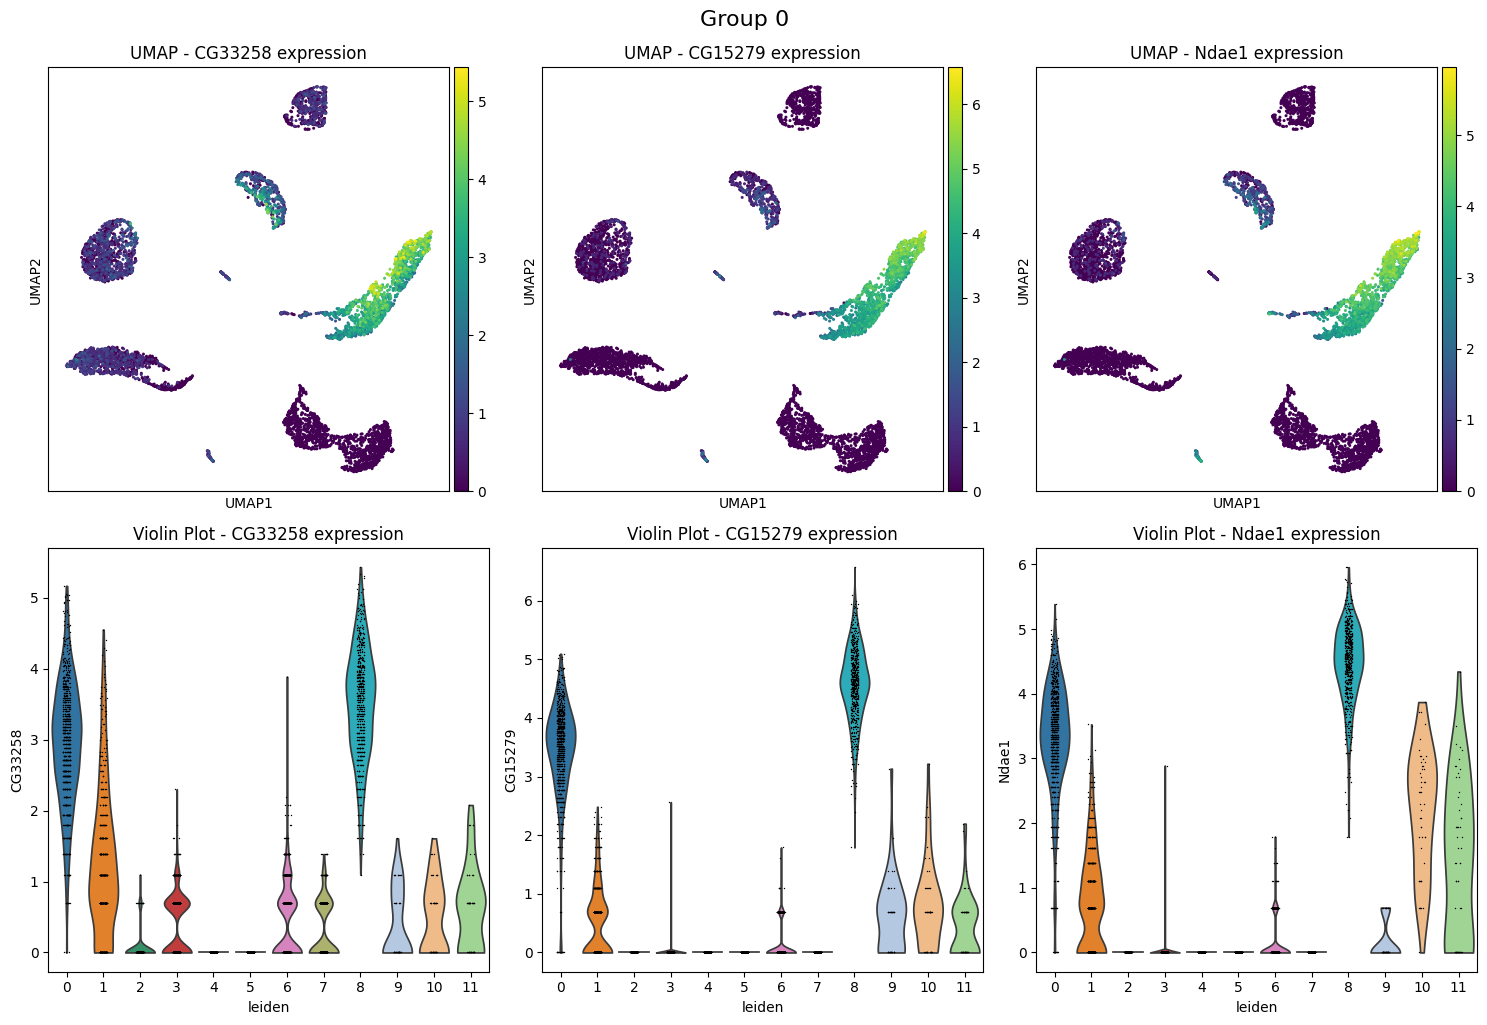

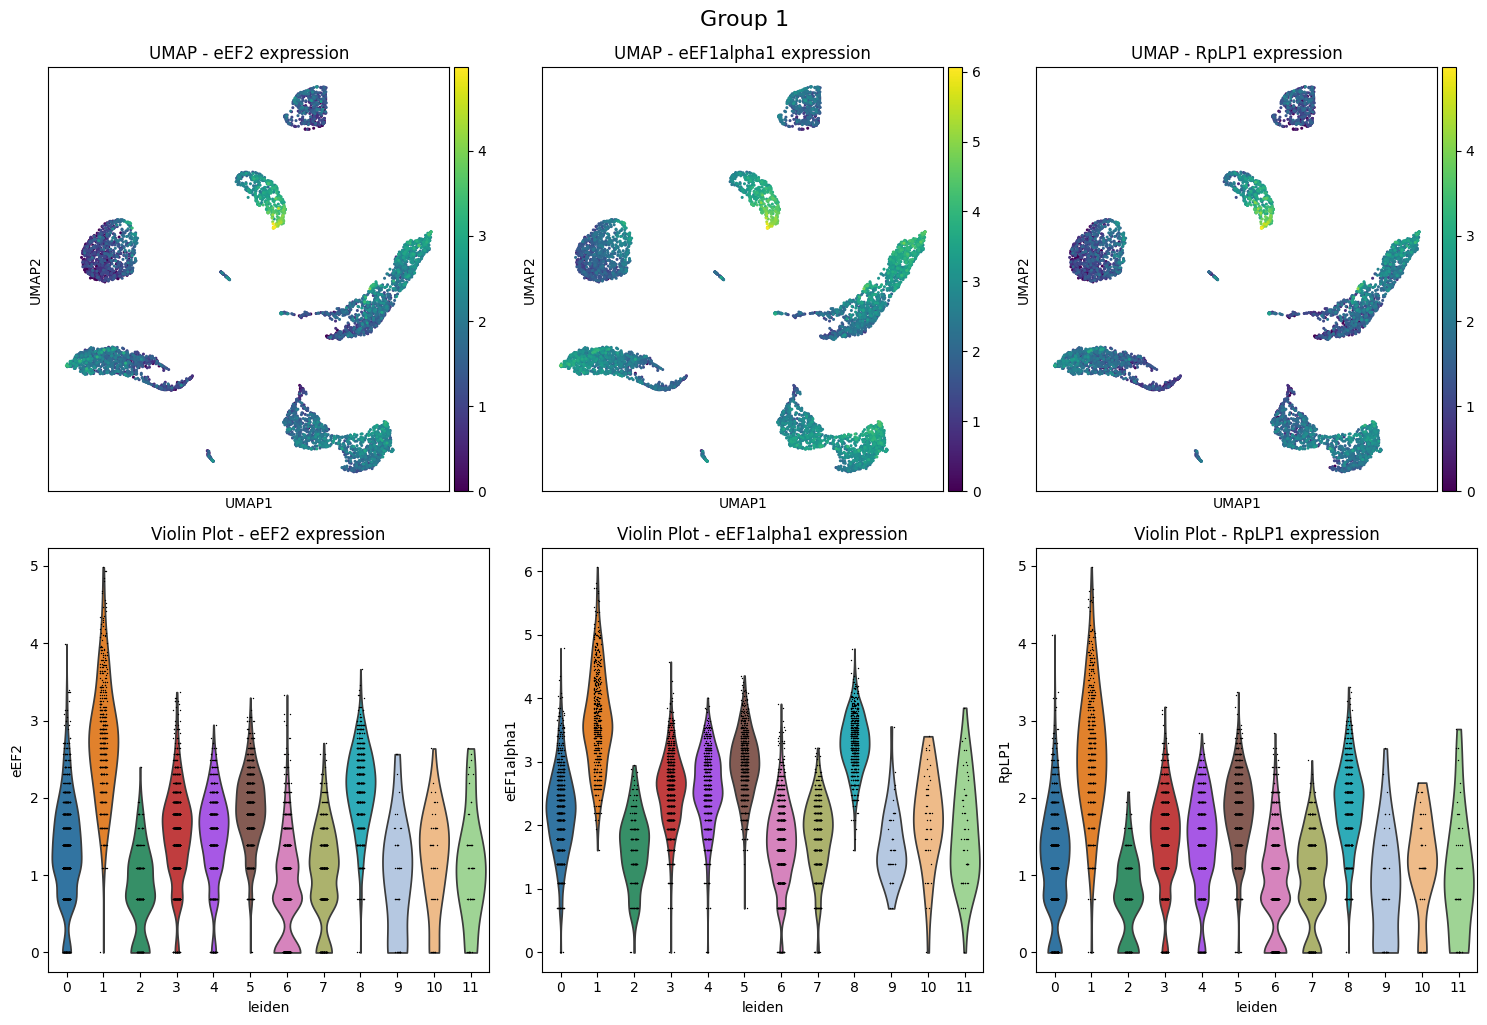

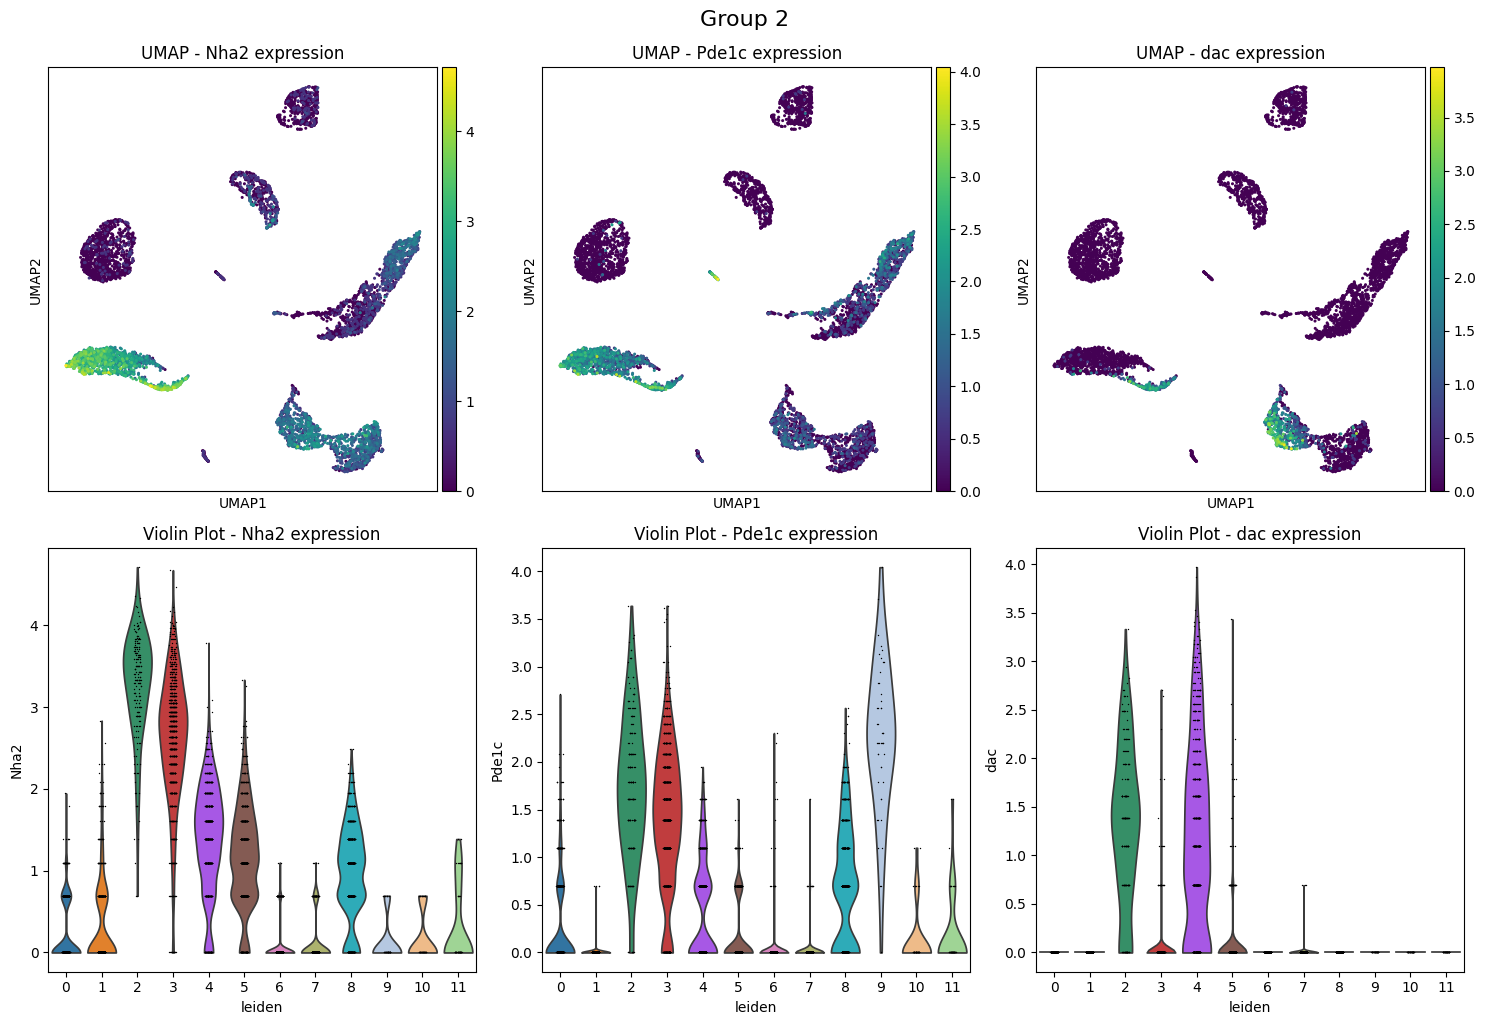

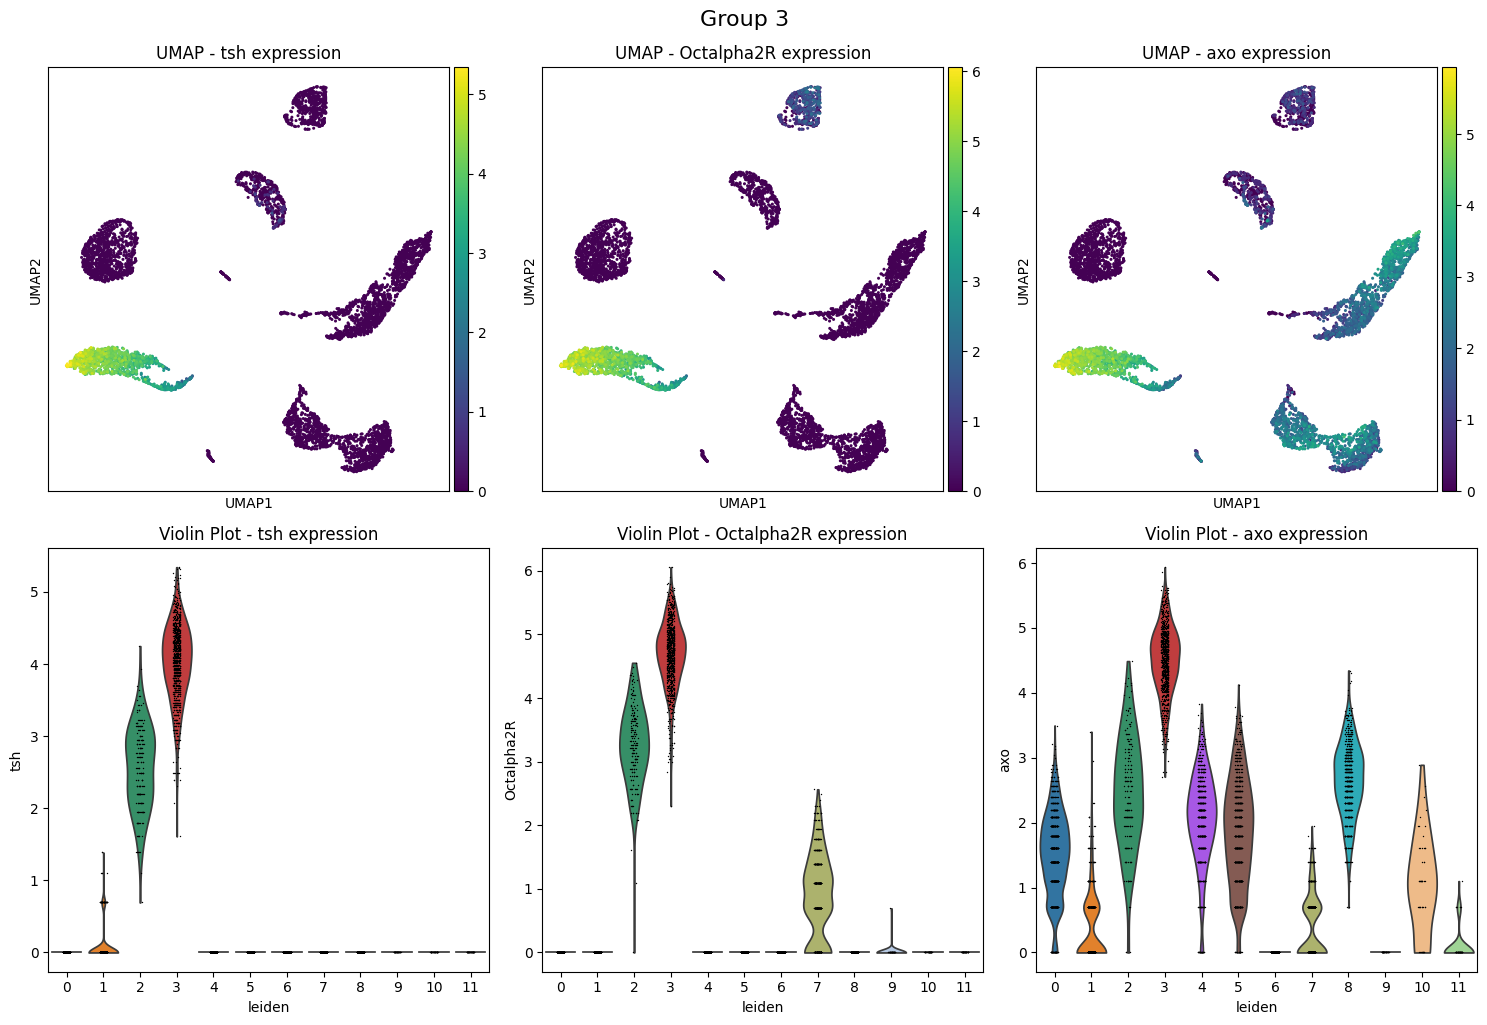

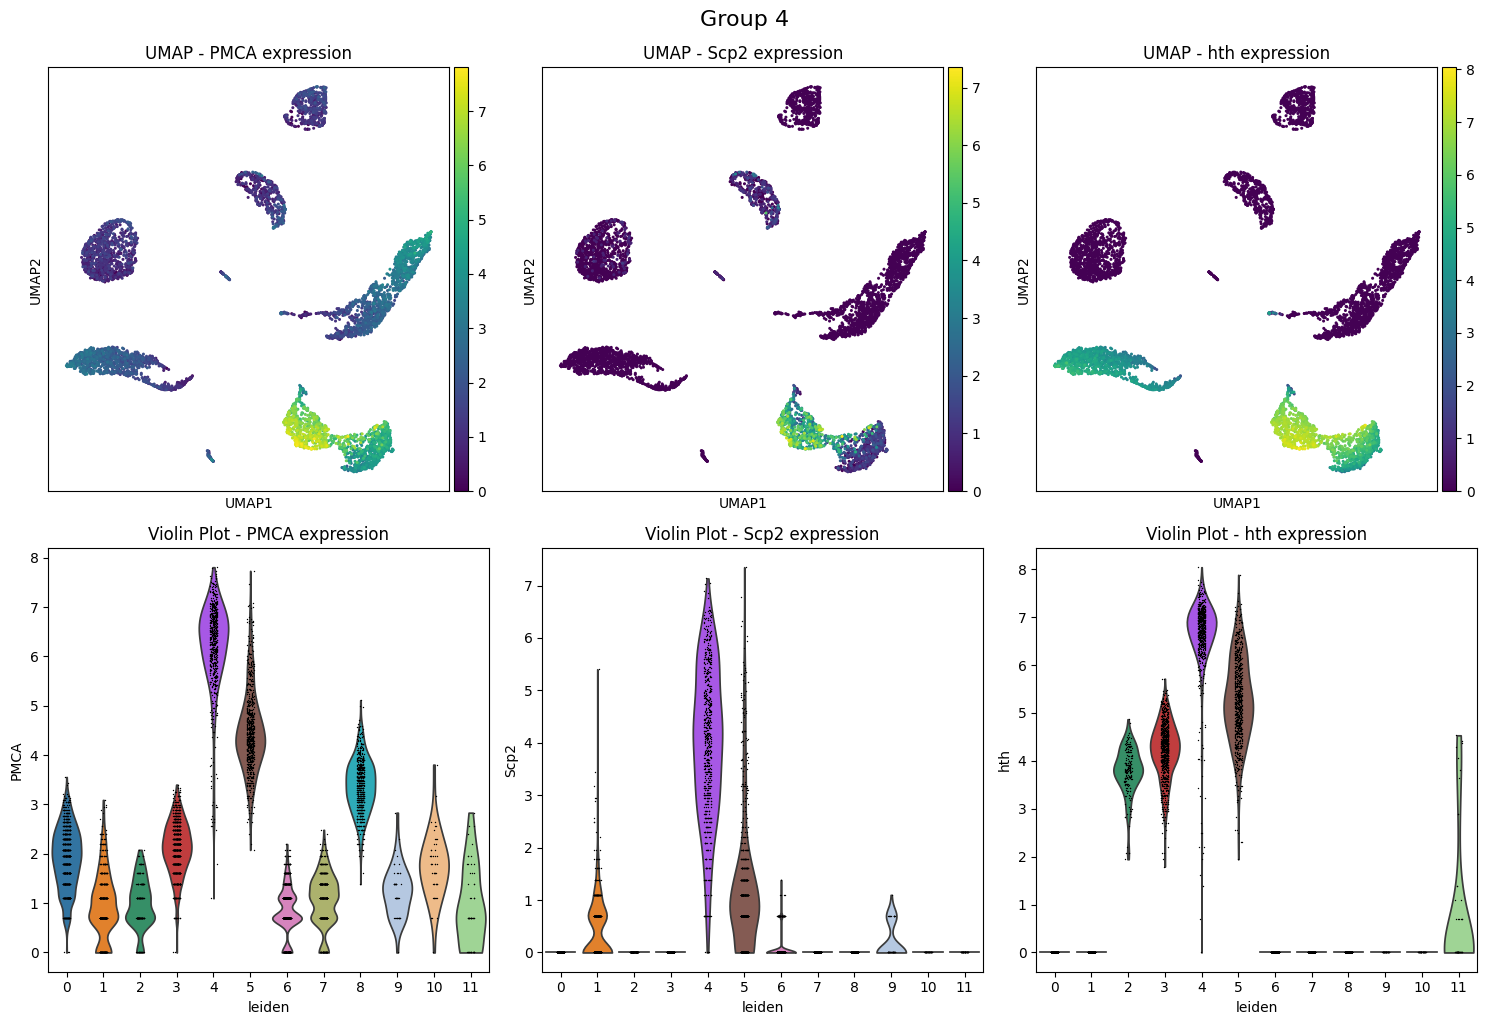

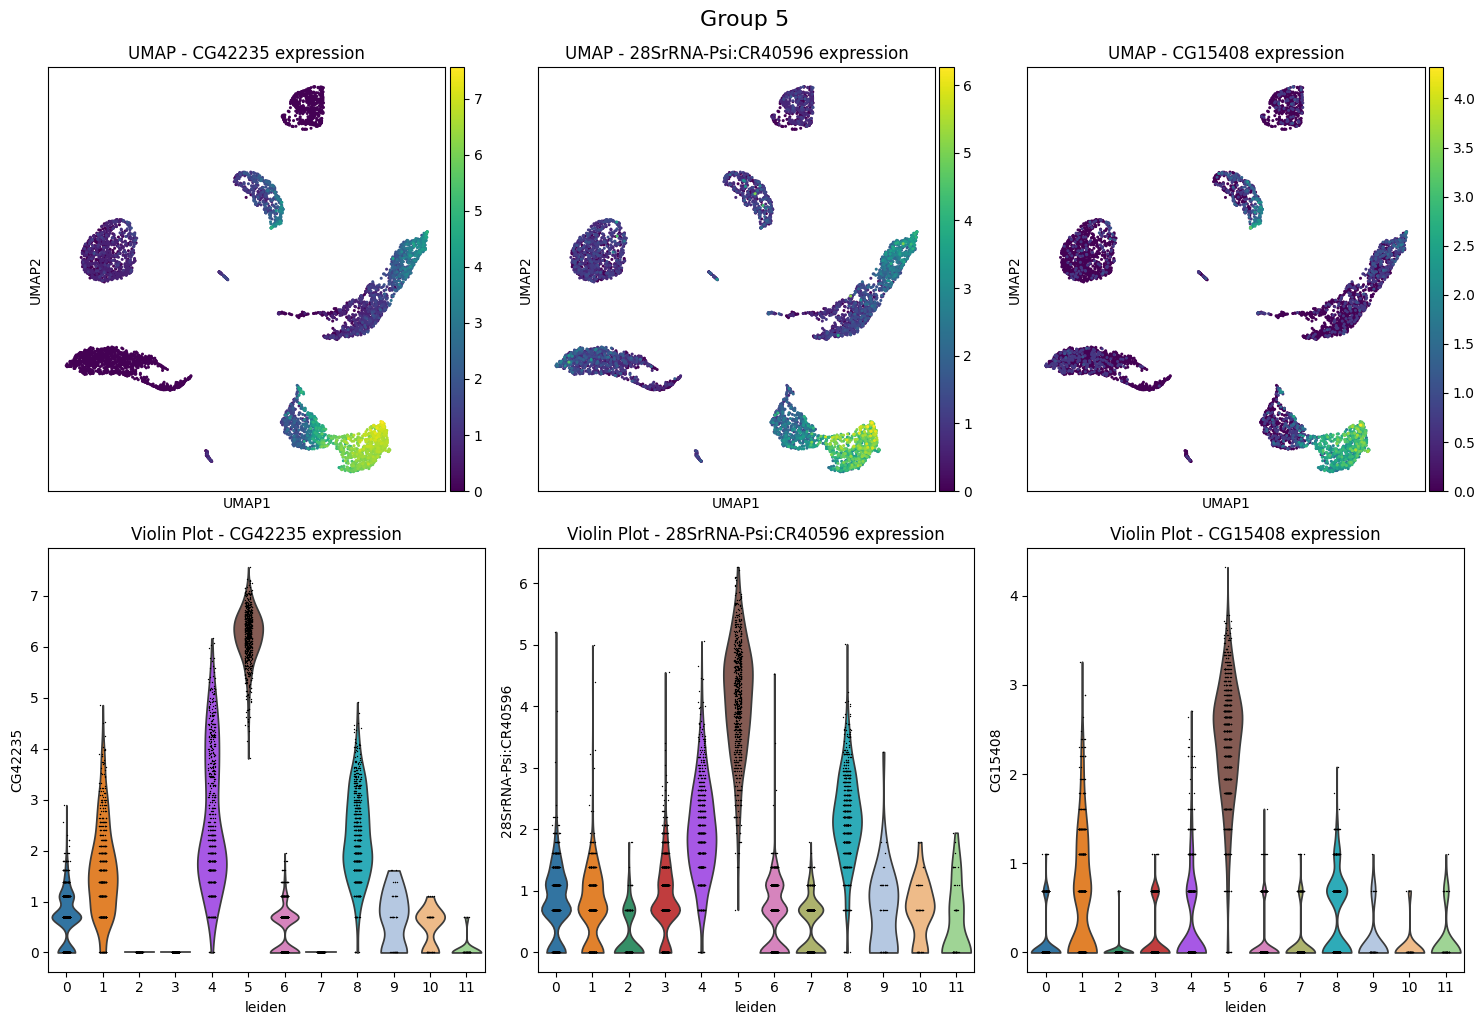

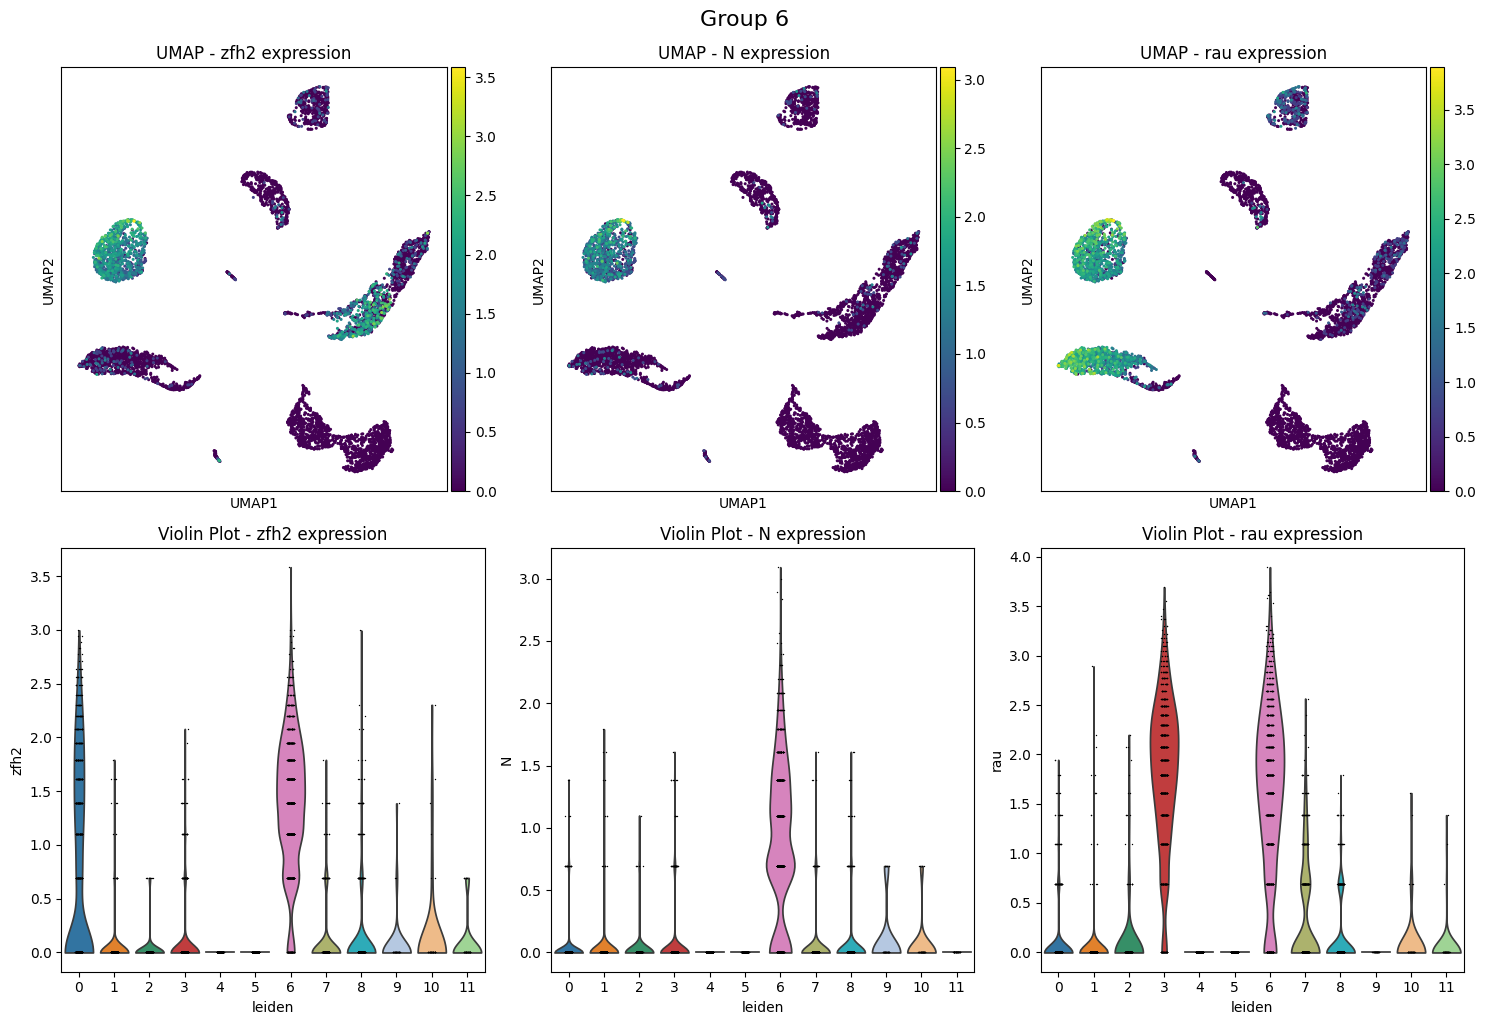

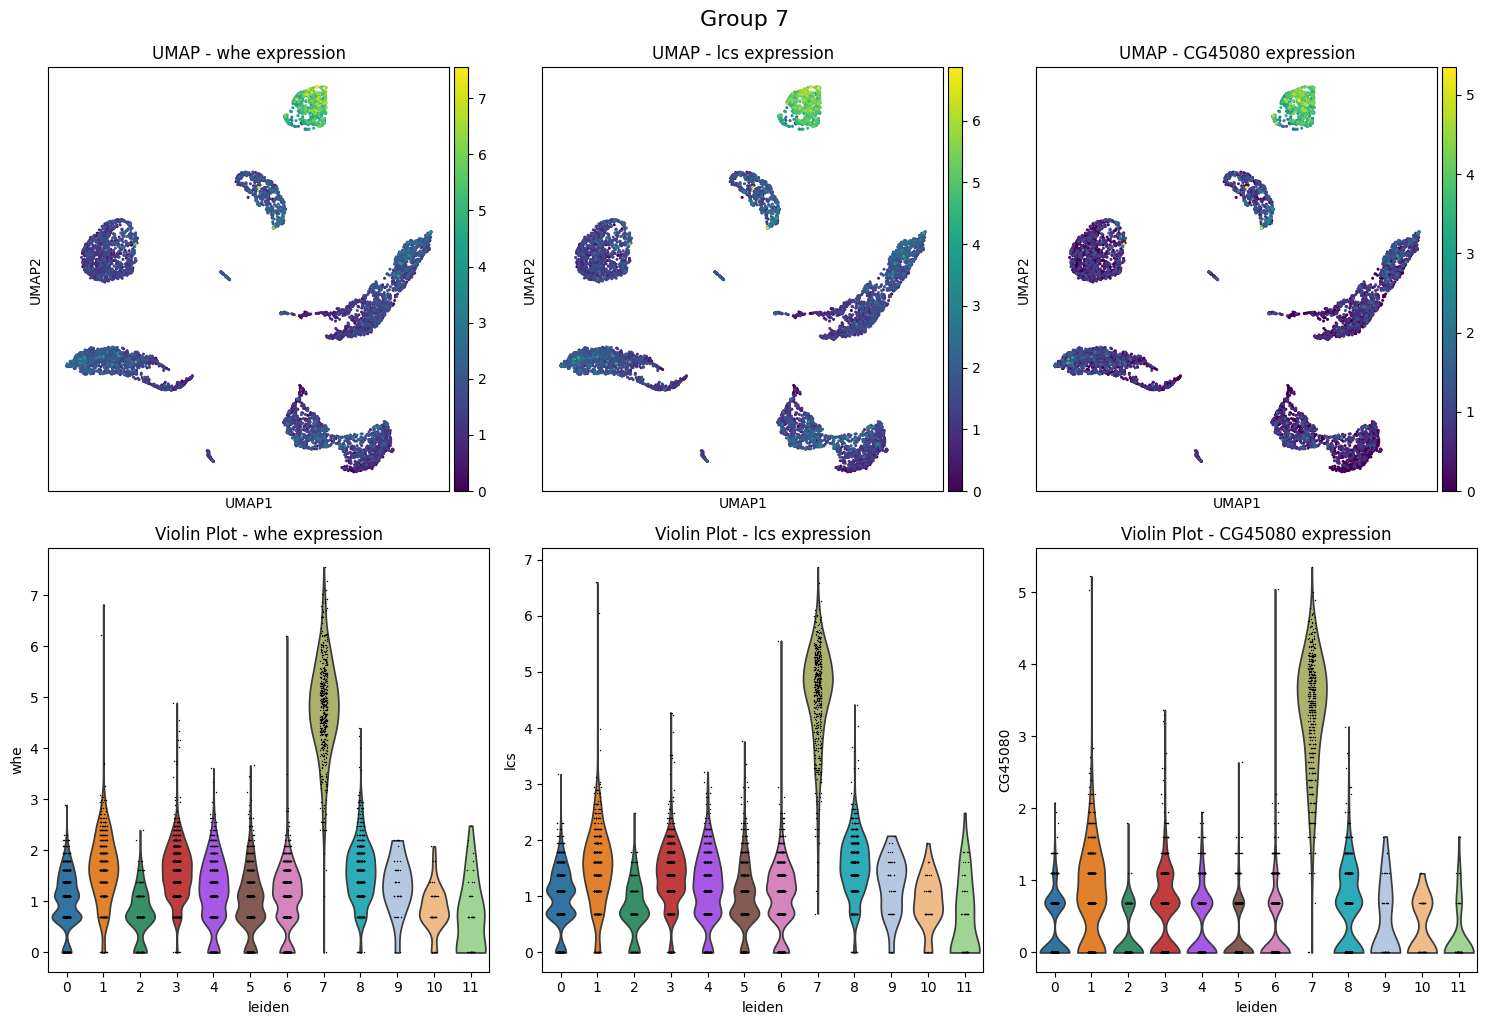

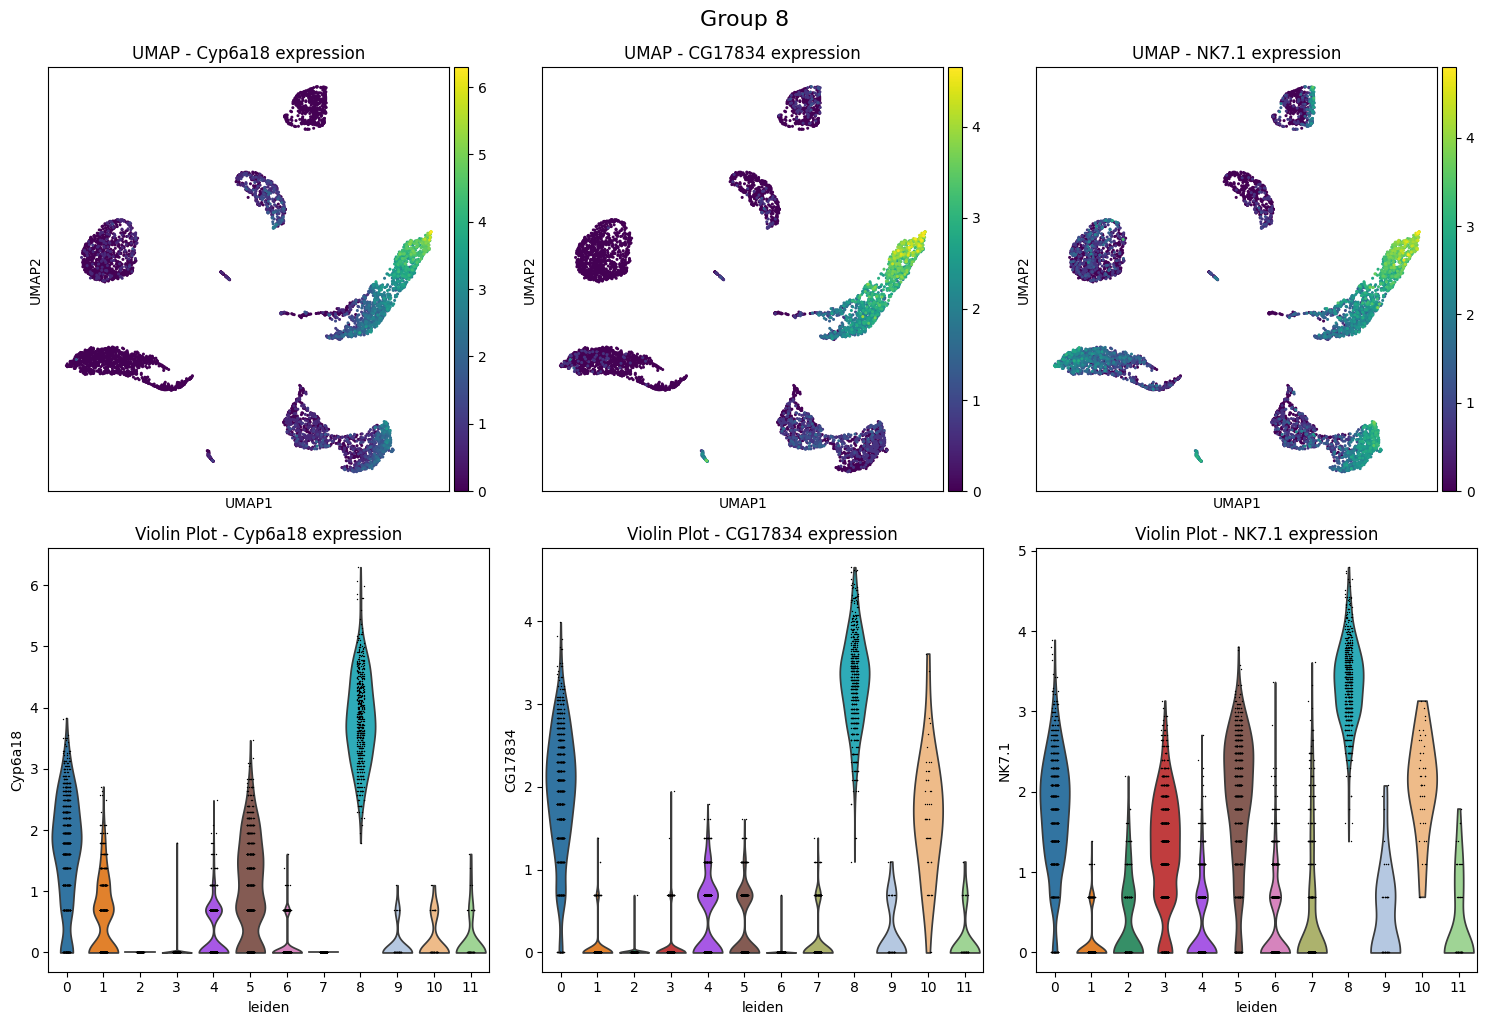

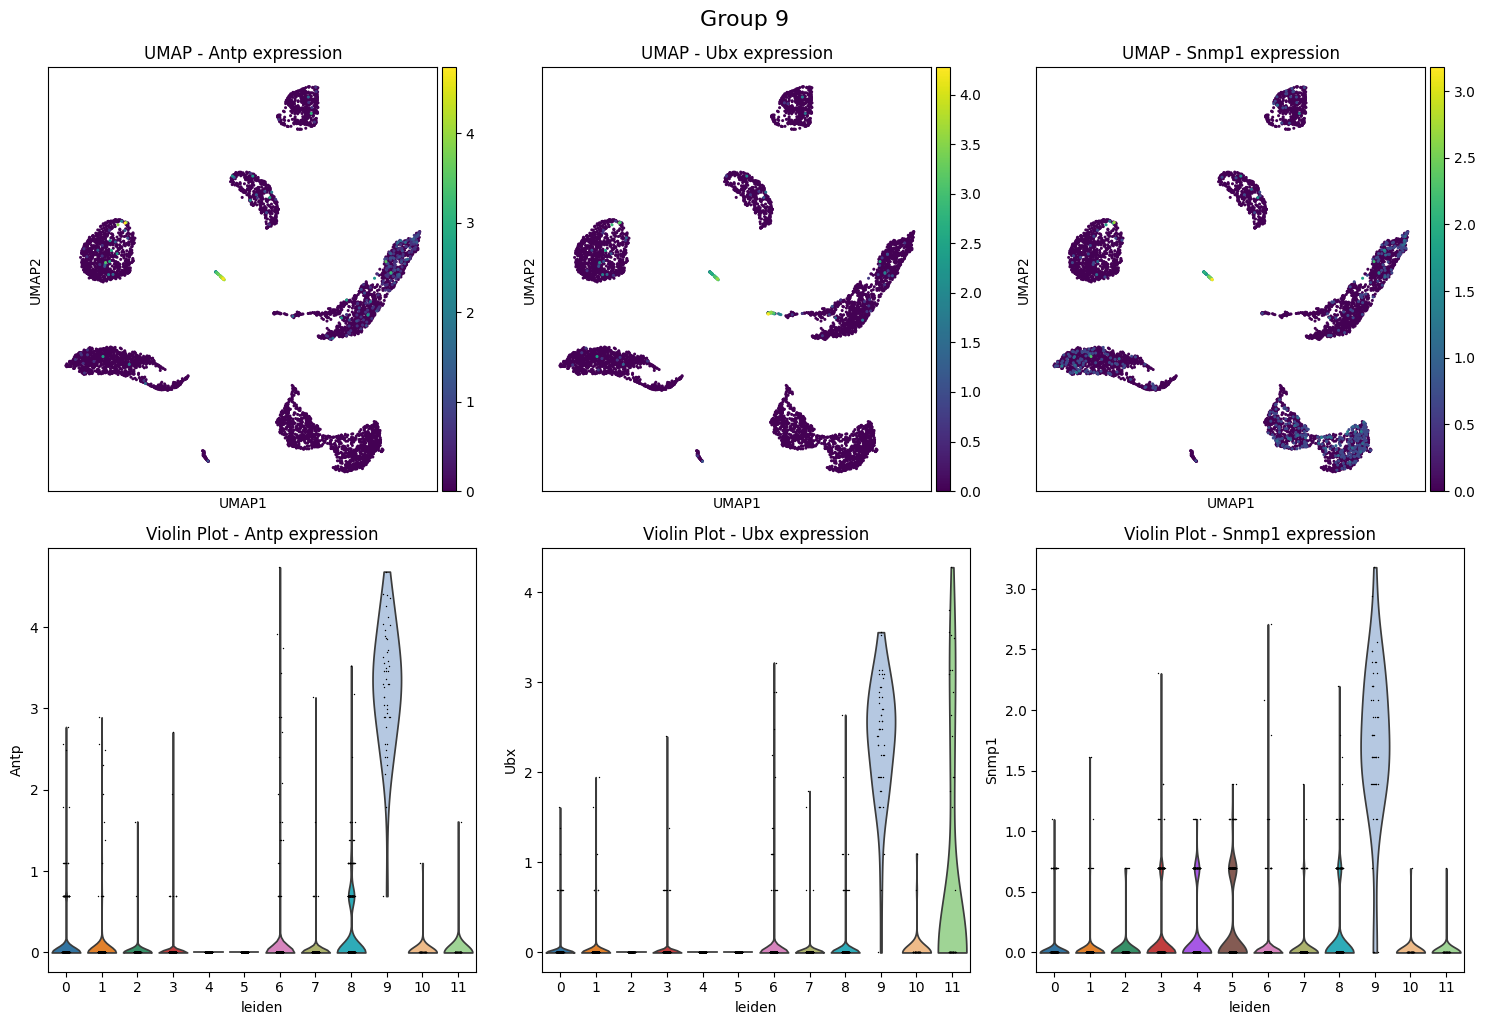

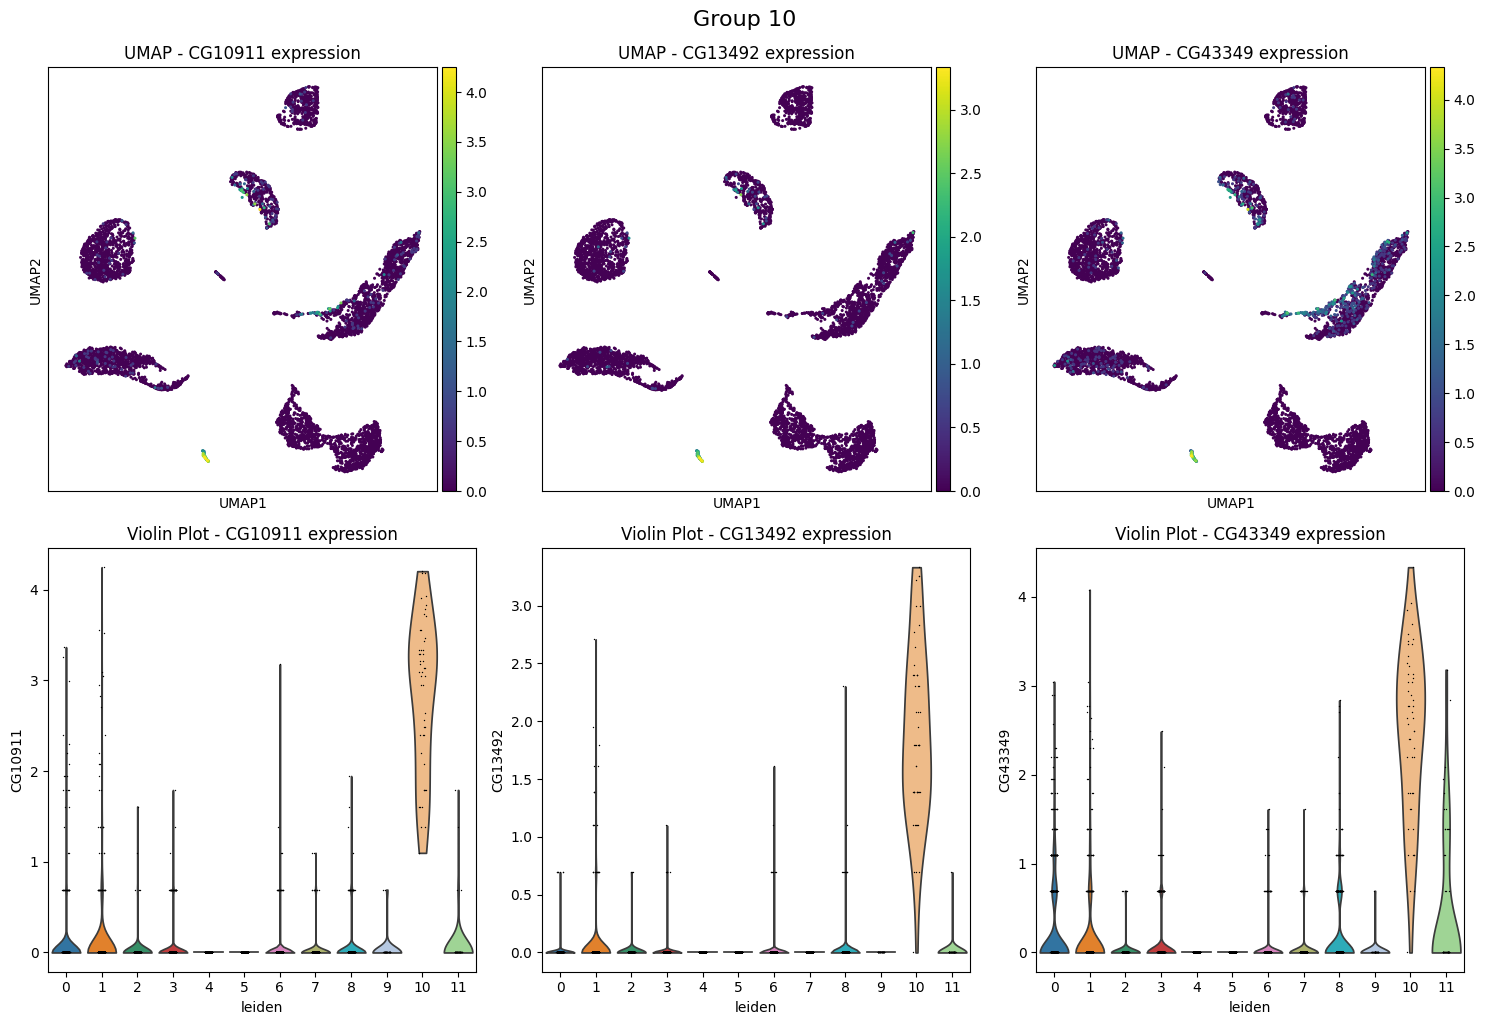

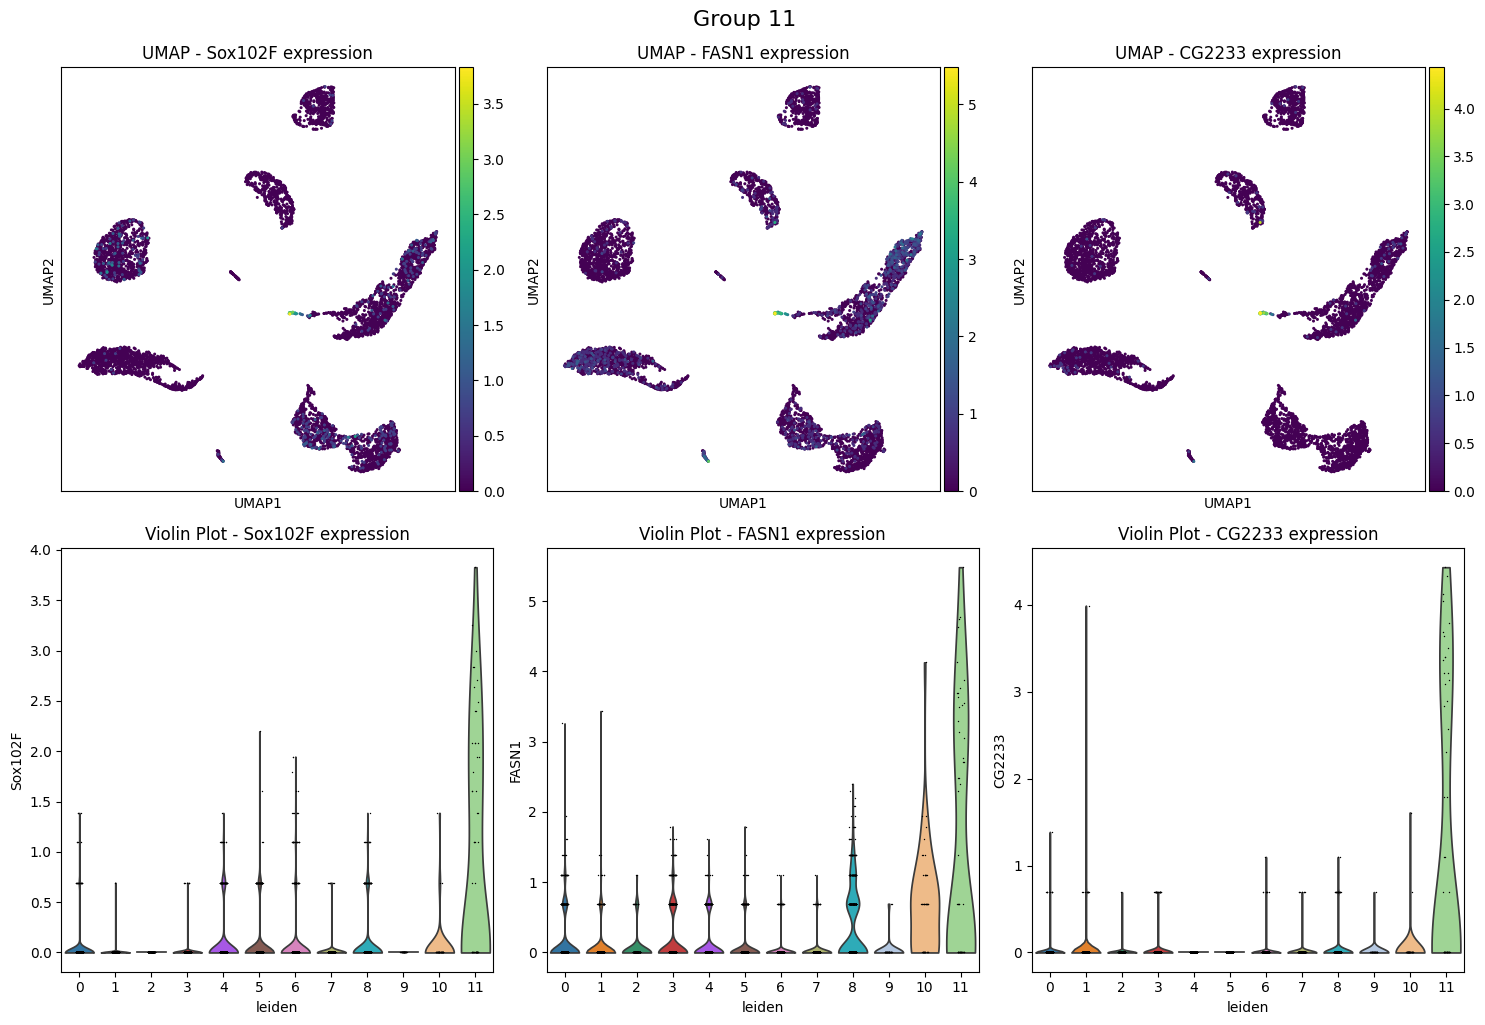

In [5]:
groups = data.obs["leiden"].cat.categories

top_genes = {}

for group in groups:
    #genes for group
    df = sc.get.rank_genes_groups_df(data, group)
    
    top_genes_group = df["names"].head(3).tolist()
    top_genes[group] = top_genes_group

for group in groups:
    top_genes_group = top_genes[group] #top gene

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))  #2 rows, 3 columns for better spacing
    axes = axes.flatten() #easy iteration

    for i, gene in enumerate(top_genes_group):
        sc.pl.umap(data, color=gene, ax=axes[i], show=False, color_map="viridis")
        axes[i].set_title(f"UMAP - {gene} expression")

        sc.pl.violin(data, keys=gene, groupby="leiden", ax=axes[i + 3], show=False)
        axes[i + 3].set_title(f"Violin Plot - {gene} expression")

    plt.tight_layout()
    plt.suptitle(f"Group {group}", fontsize=16, y=1.02)
    plt.show()


This is a recap of the names of the top marker genes for each cluster.

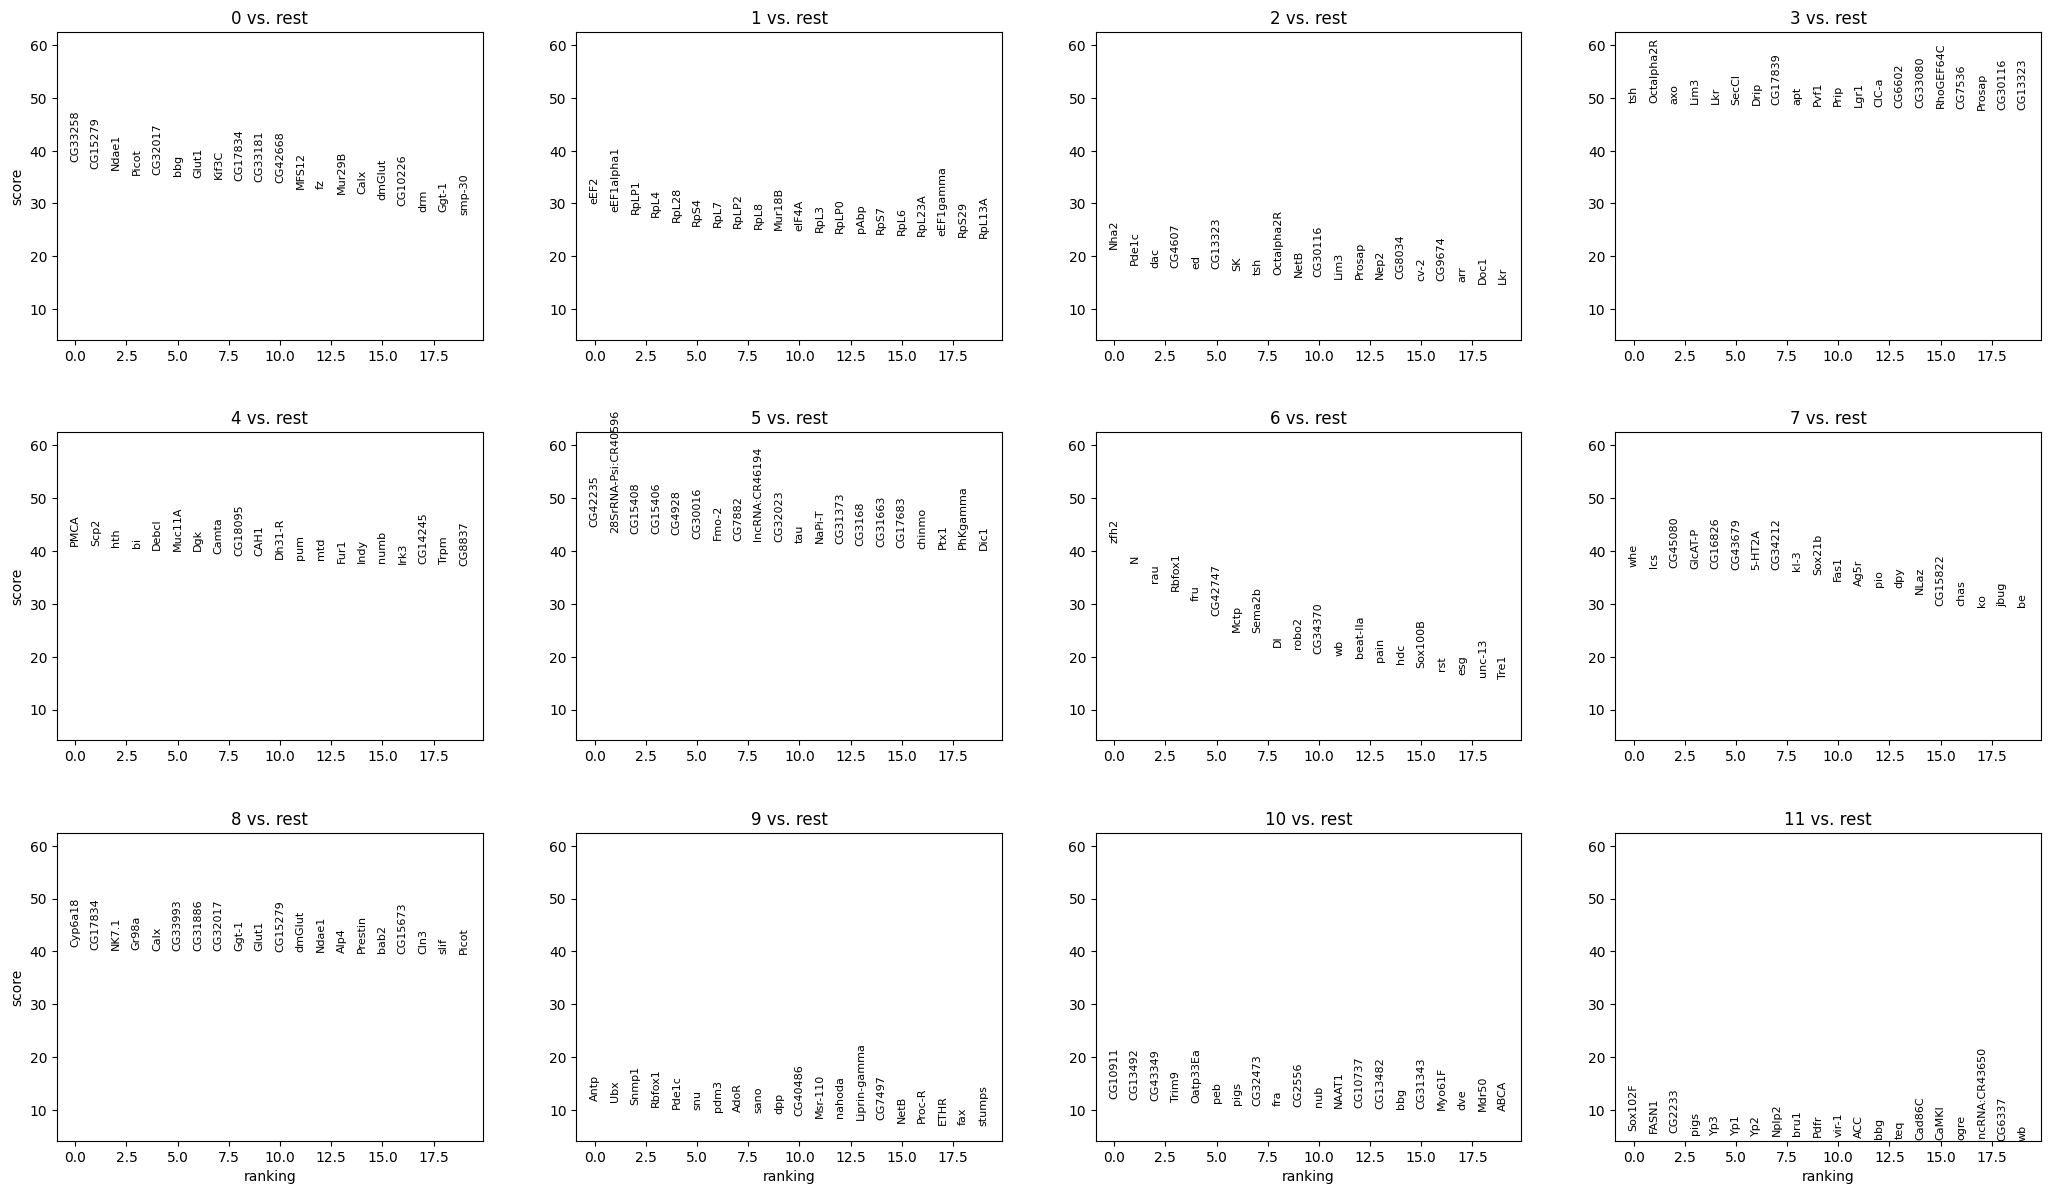

In [7]:
sc.pl.rank_genes_groups(data)